In [5]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [7]:
df=pd.read_csv("Customer Churn.csv")
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# replacing the blank space with 0 as tenure is 0 and no total charges are recorded

df["TotalCharges"]=df['TotalCharges'].replace(" ","0")
df["TotalCharges"]=df['TotalCharges'].astype("float")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [24]:
df["customerID"].duplicated().sum()

0

In [14]:
#  converted the 0 and 1 value of senior citizen to yes and no 
# to make easier to nderstand
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

In [28]:
df.head(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


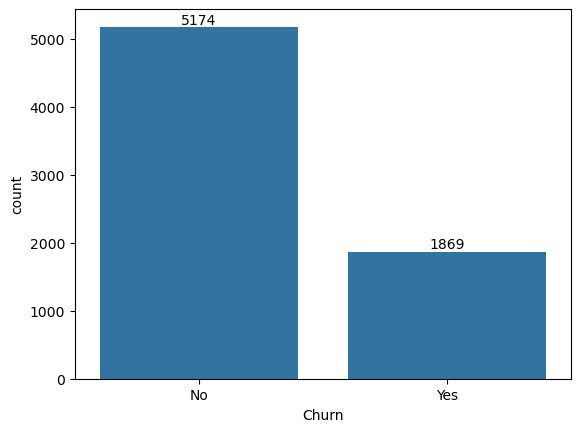

In [32]:
ax=sns.countplot(x = 'Churn', data = df)
ax.bar_label(ax.containers[0])
plt.show()

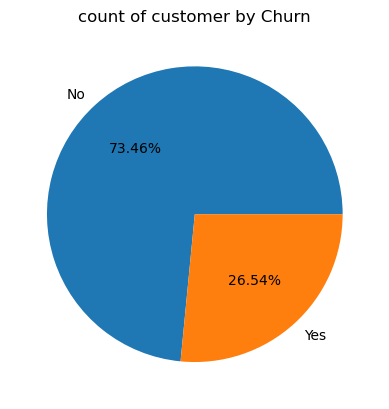

,Churn
Churn,
No,5174
Yes,1869


In [39]:
gb = df.groupby("Churn").agg({'Churn': "count"})

plt.pie(gb['Churn'],labels=gb.index,autopct="%1.2f%%")
plt.title("count of customer by Churn")
plt.show()
gb

<!-- # from the given pie pie chart we can conclude that 26.54% os our customers have churned out
# now let's explore reason behind it -->

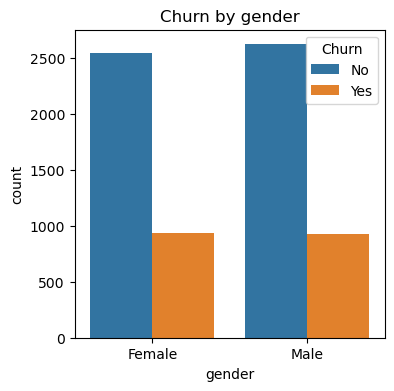

In [12]:
plt.figure(figsize=(4,4))
sns.countplot(x = "gender", data=df ,hue="Churn")
plt.title("Churn by gender")
plt.show()

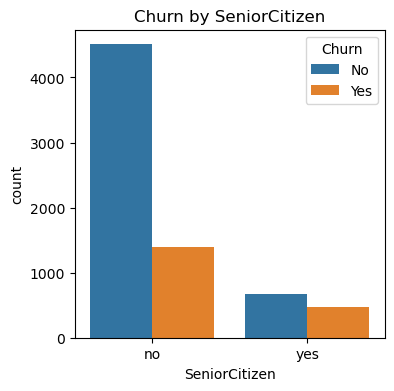

In [15]:
plt.figure(figsize=(4,4))
sns.countplot(x = "SeniorCitizen", data=df ,hue="Churn")
plt.title("Churn by SeniorCitizen")
plt.show()

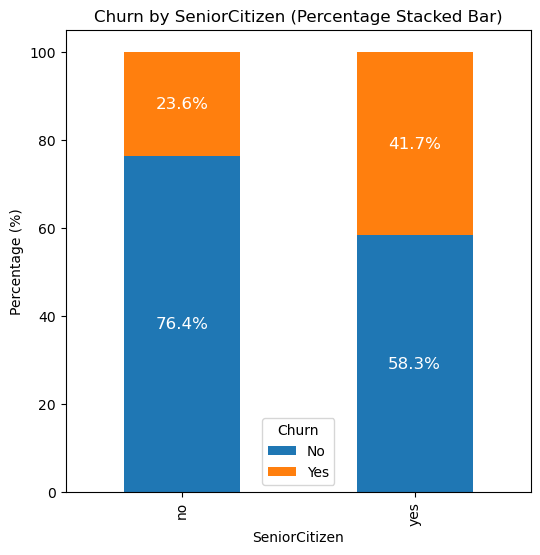

In [16]:
# Step 1: Prepare the data (count of Churn by SeniorCitizen)
counts = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)

# Step 2: Calculate percentages for each SeniorCitizen group (row-wise)
percentages = counts.div(counts.sum(axis=1), axis=0) * 100

# Step 3: Plot stacked bar chart
ax = percentages.plot(kind='bar', stacked=True, figsize=(6,6), color=['#1f77b4', '#ff7f0e'])

# Step 4: Add percentage labels on the bars
for i, senior_citizen in enumerate(percentages.index):
    cumulative = 0
    for churn in percentages.columns:
        pct = percentages.loc[senior_citizen, churn]
        if pct > 0:
            ax.text(i, cumulative + pct / 2, f"{pct:.1f}%", ha='center', va='center', color='white', fontsize=12)
            cumulative += pct

# Step 5: Add title and labels
plt.title("Churn by SeniorCitizen (Percentage Stacked Bar)")
plt.ylabel("Percentage (%)")
plt.xlabel("SeniorCitizen")
plt.legend(title='Churn')
plt.show()

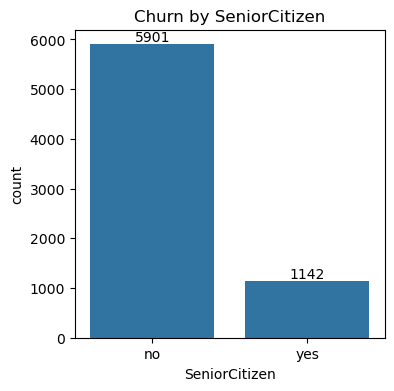

In [18]:

plt.figure(figsize=(4,4))
ax=sns.countplot(x = "SeniorCitizen", data=df )
ax.bar_label(ax.containers[0])
plt.title("Churn by SeniorCitizen")
plt.show()


In [21]:
# comparatively a greater % of people in senior citizen have churned

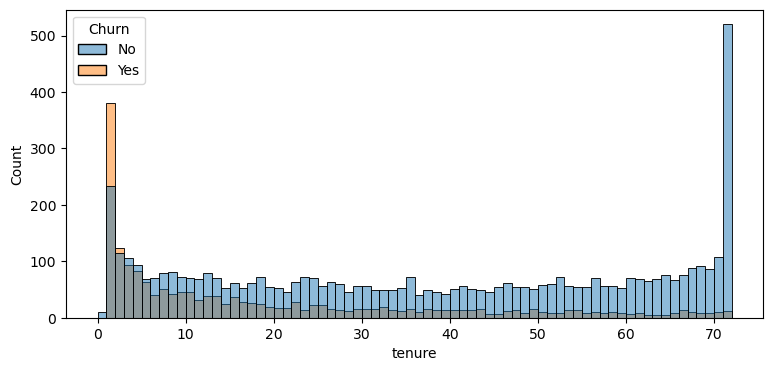

In [27]:
plt.figure(figsize=(9,4))
sns.histplot(x = "tenure", data= df,bins=72, hue="Churn")
plt.show()

In [28]:
# people who have used our services for a long time have stayed 
# and who have used our services for 1 or 2 months have churned out 

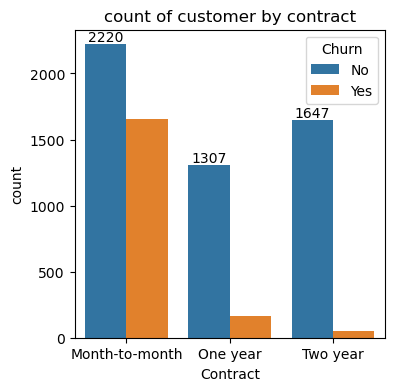

In [30]:

plt.figure(figsize=(4,4))
ax=sns.countplot(x = "Contract", data=df,hue="Churn" )
ax.bar_label(ax.containers[0])
plt.title("count of customer by contract")
plt.show()



#people who have months to month contract are likely to churn then from those who have one or 2 year of contract 

In [31]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

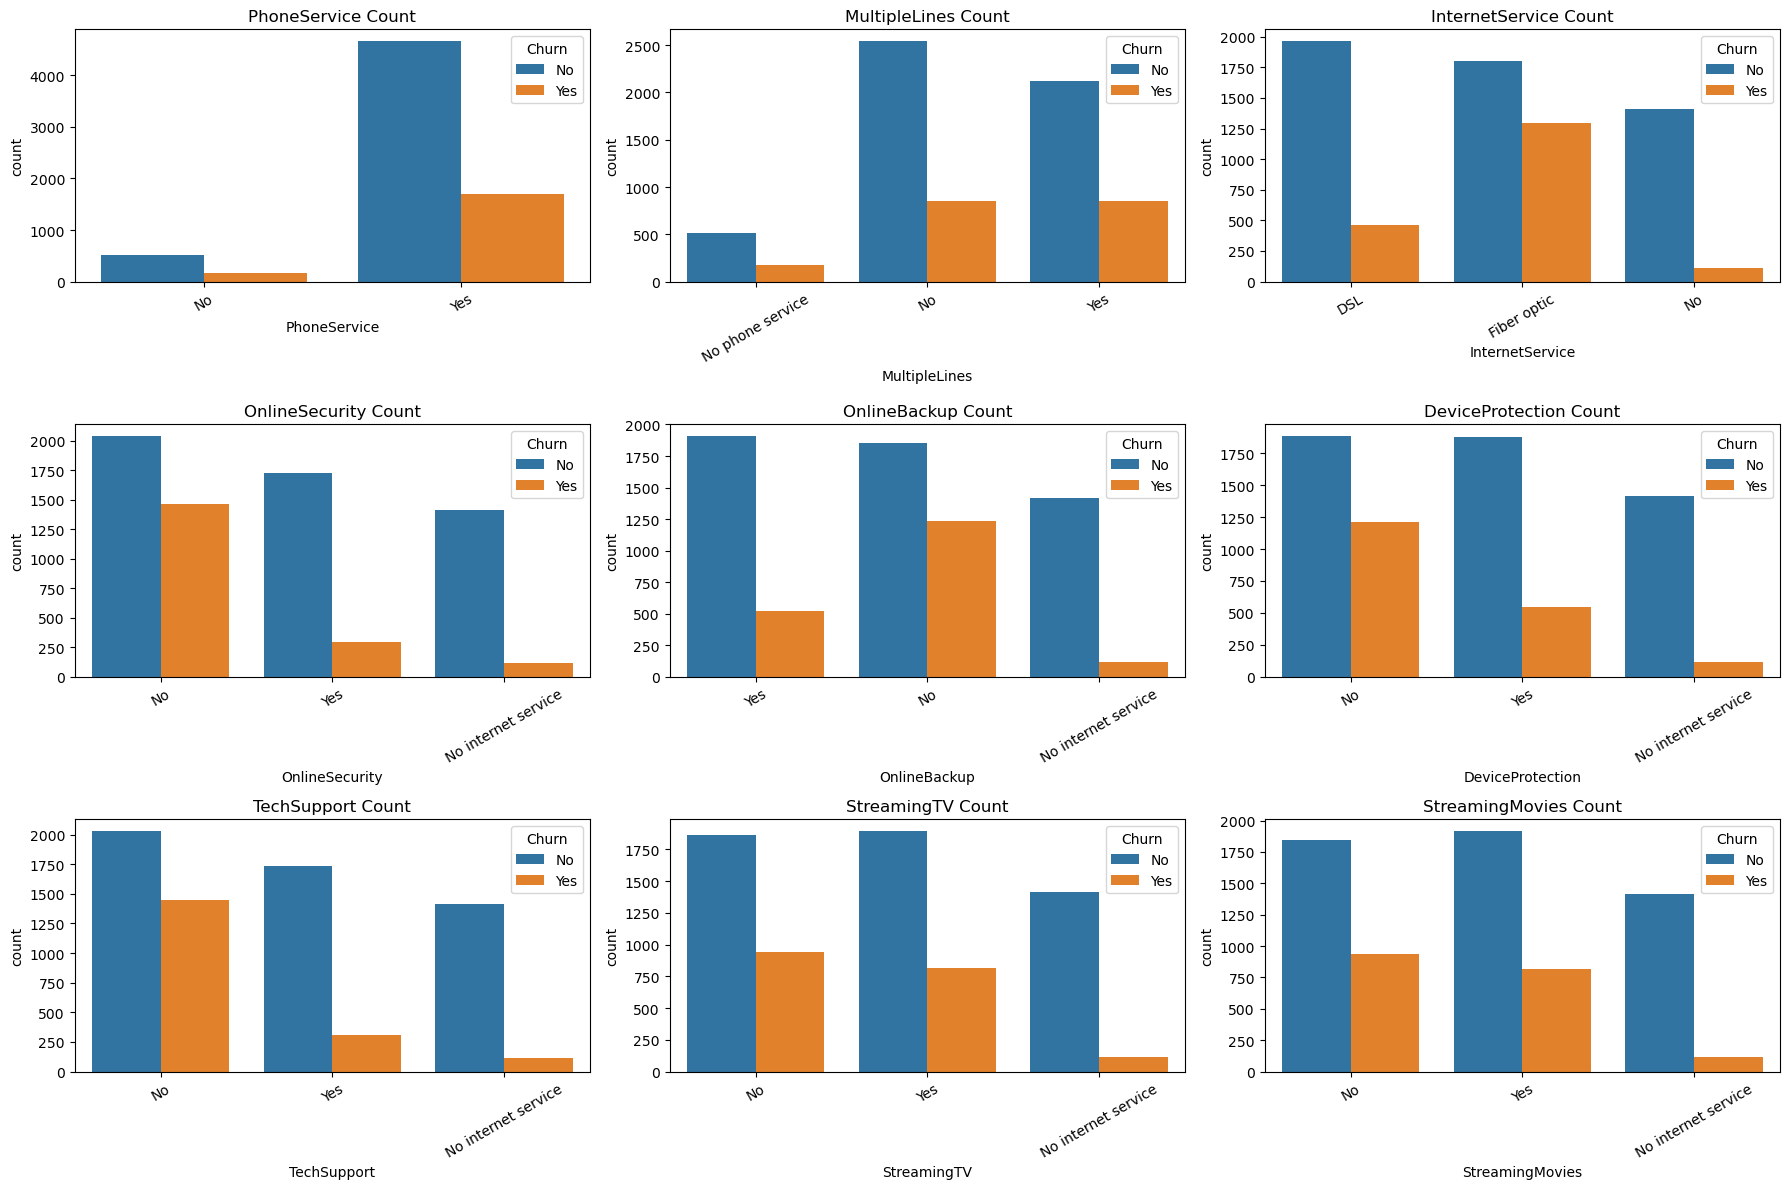

In [33]:
# List of columns you want to plot
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set up the subplot grid: 3 rows x 3 columns
plt.figure(figsize=(18, 12))  # Adjust size to make it readable

for i, col in enumerate(cols, start=1):
    plt.subplot(3, 3, i)  # 3x3 grid, position i
    sns.countplot(x=col, data=df,hue="Churn")
    plt.title(f'{col} Count')
    plt.xticks(rotation=30)  # Rotate x labels for better visibility
    plt.tight_layout()

plt.show()

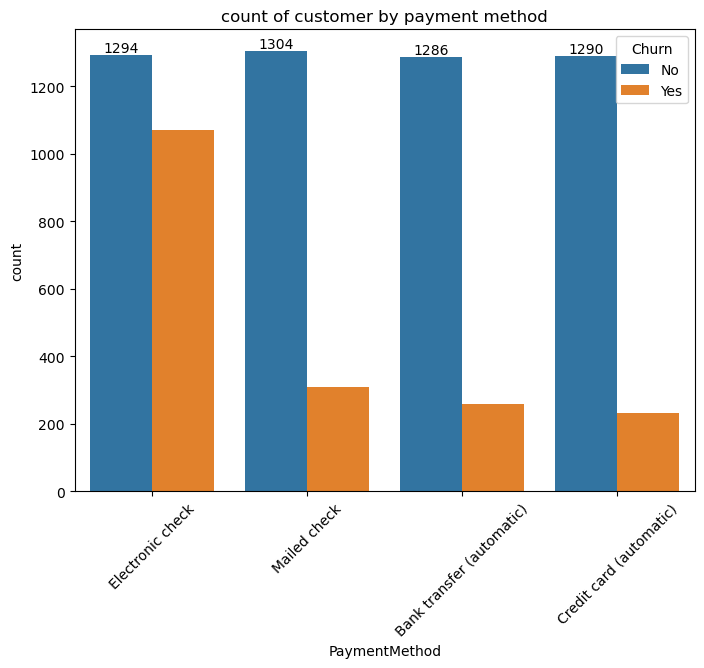

In [39]:

plt.figure(figsize=(8,6))
ax=sns.countplot(x = "PaymentMethod", data=df,hue="Churn" )
ax.bar_label(ax.containers[0])
plt.title("count of customer by payment method")
plt.xticks(rotation=45)
plt.show()

<!-- customer is likely to churn who is using clectronic cheque as a payment method -->